<a href="https://colab.research.google.com/github/rehman2222/AI/blob/main/Fuzzy_Result_Reproduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.3 MB/s eta 0:00:00


Tip: 11.15
Brake: 54.98


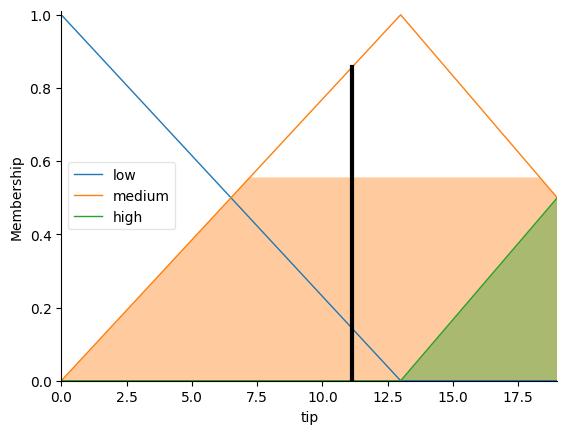

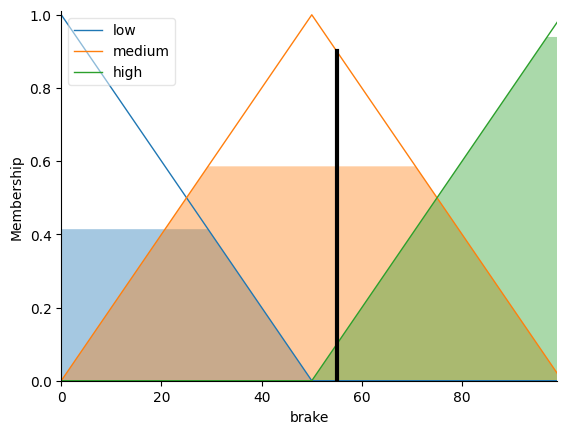

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# -----------------------------
# Restaurant Tipping System
# -----------------------------
def restaurant_tipping():
    # Define input and output variables
    service = ctrl.Antecedent(np.arange(0, 10, 1), 'service')
    food = ctrl.Antecedent(np.arange(0, 10, 1), 'food')
    tip = ctrl.Consequent(np.arange(0, 20, 1), 'tip')

    # Define membership functions using automf
    service.automf(3)       # poor, average, good
    food.automf(3)          # poor, average, good

    # Define TIP membership functions
    tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
    tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
    tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

    # Fuzzy rules
    rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
    rule2 = ctrl.Rule(service['average'], tip['medium'])
    rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

    # Create control system
    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    # Input values
    tipping.input['service'] = 6.5
    tipping.input['food'] = 9.8

    # Compute result
    tipping.compute()

    # Output
    print(f"Tip: {tipping.output['tip']:.2f}")
    tip.view(sim=tipping)


# -----------------------------
# ABS Brake System
# -----------------------------
def abs_brake_system():
    # Define input and output variables
    speed = ctrl.Antecedent(np.arange(0, 100, 1), 'speed')
    slip = ctrl.Antecedent(np.arange(0, 100, 1), 'slip')
    brake = ctrl.Consequent(np.arange(0, 100, 1), 'brake')

    # Automatic membership functions
    speed.automf(3)
    slip.automf(3)

    # Define BRAKE membership functions
    brake['low'] = fuzz.trimf(brake.universe, [0, 0, 50])
    brake['medium'] = fuzz.trimf(brake.universe, [0, 50, 100])
    brake['high'] = fuzz.trimf(brake.universe, [50, 100, 100])

    # Fuzzy rules
    rule1 = ctrl.Rule(speed['poor'] | slip['poor'], brake['high'])
    rule2 = ctrl.Rule(speed['average'], brake['medium'])
    rule3 = ctrl.Rule(speed['good'] | slip['good'], brake['low'])

    # Create control system
    braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    braking = ctrl.ControlSystemSimulation(braking_ctrl)

    # Input values
    braking.input['speed'] = 70
    braking.input['slip'] = 3

    # Compute result
    braking.compute()

    # Output
    print(f"Brake: {braking.output['brake']:.2f}")
    brake.view(sim=braking)


# -----------------------------
# Run Systems
# -----------------------------
restaurant_tipping()
abs_brake_system()
plt.show()
